# IRIS Retail Data Analysis - Comprehensive Deep Dive

This notebook analyzes all provided CSV files to determine their relevance for the IRIS chatbot, infer data schema/relationships, and perform trend analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# Set plot style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load All Data

In [2]:
DATA_PATH = 'Sales Dataset'
csv_files = glob.glob(os.path.join(DATA_PATH, "*.csv"))
dataframes = {}

print(f"Found {len(csv_files)} files.")

for file in csv_files:
    filename = os.path.basename(file)
    try:
        # Attempt to read with different encodings if default fails
        try:
            df = pd.read_csv(file, encoding='utf-8')
        except UnicodeDecodeError:
            df = pd.read_csv(file, encoding='ISO-8859-1')
            
        dataframes[filename] = df
        print(f"Loaded {filename}: {df.shape}")
    except Exception as e:
        print(f"Error loading {filename}: {e}")

Found 7 files.


Loaded Amazon Sale Report.csv: (128975, 24)
Loaded Cloud Warehouse Compersion Chart.csv: (50, 4)
Loaded Expense IIGF.csv: (17, 5)
Loaded International sale Report.csv: (37432, 10)
Loaded May-2022.csv: (1330, 17)
Loaded P  L March 2021.csv: (1330, 18)
Loaded Sale Report.csv: (9271, 7)


C:\Users\ashis\AppData\Local\Temp\ipykernel_3240\3810444532.py:12: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, encoding='utf-8')


## 2. Schema Inference & Relationship Mapping

We will inspect columns of all dataframes to find common keys (e.g., `Order ID`, `SKU`, `Date`) and understand what each file represents.

In [3]:
all_columns = {}
for name, df in dataframes.items():
    all_columns[name] = set(df.columns)
    print(f"\n--- {name} ---")
    print(f"Columns: {list(df.columns)}")
    display(df.head(3))

# Find common columns to identify relationships
import itertools

print("\n--- Potential Relationships (Common Columns) ---")
file_pairs = itertools.combinations(dataframes.keys(), 2)
for name1, name2 in file_pairs:
    common = all_columns[name1].intersection(all_columns[name2])
    if common:
        print(f"{name1} <-> {name2}: {common}")


--- Amazon Sale Report.csv ---
Columns: ['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids', 'B2B', 'fulfilled-by', 'Unnamed: 22']


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN



--- Cloud Warehouse Compersion Chart.csv ---
Columns: ['index', 'Shiprocket', 'Unnamed: 1', 'INCREFF']


,index,Shiprocket,Unnamed: 1,INCREFF
0,0,Heads,Price (Per Unit),Price (Per Unit)
1,1,Inbound (Fresh Stock and RTO),₹4.00,4
2,2,Outbound,₹7.00,11



--- Expense IIGF.csv ---
Columns: ['index', 'Recived Amount', 'Unnamed: 1', 'Expance', 'Unnamed: 3']


,index,Recived Amount,Unnamed: 1,Expance,Unnamed: 3
0,0,Particular,Amount,Particular,Amount
1,1,06-19-22,1000,Large Bag,380
2,2,06-20-22,1500,"Stationary(Soft Pin, Paper pin for Dupatta, Fe...",170



--- International sale Report.csv ---
Columns: ['index', 'DATE', 'Months', 'CUSTOMER', 'Style', 'SKU', 'Size', 'PCS', 'RATE', 'GROSS AMT']


,index,DATE,Months,CUSTOMER,Style,SKU,Size,PCS,RATE,GROSS AMT
0,0,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-L,L,1.00,616.56,617.00
1,1,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XL,XL,1.00,616.56,617.00
2,2,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XXL,XXL,1.00,616.56,617.00



--- May-2022.csv ---
Columns: ['index', 'Sku', 'Style Id', 'Catalog', 'Category', 'Weight', 'TP', 'MRP Old', 'Final MRP Old', 'Ajio MRP', 'Amazon MRP', 'Amazon FBA MRP', 'Flipkart MRP', 'Limeroad MRP', 'Myntra MRP', 'Paytm MRP', 'Snapdeal MRP']


,index,Sku,Style Id,Catalog,Category,Weight,TP,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP
0,0,Os206_3141_S,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
1,1,Os206_3141_M,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
2,2,Os206_3141_L,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295



--- P  L March 2021.csv ---
Columns: ['index', 'Sku', 'Style Id', 'Catalog', 'Category', 'Weight', 'TP 1', 'TP 2', 'MRP Old', 'Final MRP Old', 'Ajio MRP', 'Amazon MRP', 'Amazon FBA MRP', 'Flipkart MRP', 'Limeroad MRP', 'Myntra MRP', 'Paytm MRP', 'Snapdeal MRP']


,index,Sku,Style Id,Catalog,Category,Weight,TP 1,TP 2,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP
0,0,Os206_3141_S,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
1,1,Os206_3141_M,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
2,2,Os206_3141_L,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295



--- Sale Report.csv ---
Columns: ['index', 'SKU Code', 'Design No.', 'Stock', 'Category', 'Size', 'Color']


,index,SKU Code,Design No.,Stock,Category,Size,Color
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red



--- Potential Relationships (Common Columns) ---
Amazon Sale Report.csv <-> Cloud Warehouse Compersion Chart.csv: {'index'}
Amazon Sale Report.csv <-> Expense IIGF.csv: {'index'}
Amazon Sale Report.csv <-> International sale Report.csv: {'Size', 'SKU', 'Style', 'index'}
Amazon Sale Report.csv <-> May-2022.csv: {'index', 'Category'}
Amazon Sale Report.csv <-> P  L March 2021.csv: {'index', 'Category'}
Amazon Sale Report.csv <-> Sale Report.csv: {'Size', 'index', 'Category'}
Cloud Warehouse Compersion Chart.csv <-> Expense IIGF.csv: {'index', 'Unnamed: 1'}
Cloud Warehouse Compersion Chart.csv <-> International sale Report.csv: {'index'}
Cloud Warehouse Compersion Chart.csv <-> May-2022.csv: {'index'}
Cloud Warehouse Compersion Chart.csv <-> P  L March 2021.csv: {'index'}
Cloud Warehouse Compersion Chart.csv <-> Sale Report.csv: {'index'}
Expense IIGF.csv <-> International sale Report.csv: {'index'}
Expense IIGF.csv <-> May-2022.csv: {'index'}
Expense IIGF.csv <-> P  L March 2021.csv: {'

## 3. Detailed Analysis by File

### 3.1 Amazon Sale Report (Primary Sales Data)
Already analyzed, but let's recap key metrics for comparison.

In [4]:
df_amazon = dataframes.get('Amazon Sale Report.csv')
if df_amazon is not None:
    df_amazon['Date'] = pd.to_datetime(df_amazon['Date'], errors='coerce')
    print(f"Amazon Sales Range: {df_amazon['Date'].min()} to {df_amazon['Date'].max()}")
    print(f"Total Amazon Records: {len(df_amazon)}")

Amazon Sales Range: 2022-03-31 00:00:00 to 2022-06-29 00:00:00
Total Amazon Records: 128975


C:\Users\ashis\AppData\Local\Temp\ipykernel_3240\1081965549.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_amazon['Date'] = pd.to_datetime(df_amazon['Date'], errors='coerce')


### 3.2 International Sale Report
Analyzing international performance.

International Sales Range: 2021-06-05 00:00:00 to 2022-05-11 00:00:00


C:\Users\ashis\AppData\Local\Temp\ipykernel_3240\3401994696.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_intl['DATE'] = pd.to_datetime(df_intl['DATE'], errors='coerce')


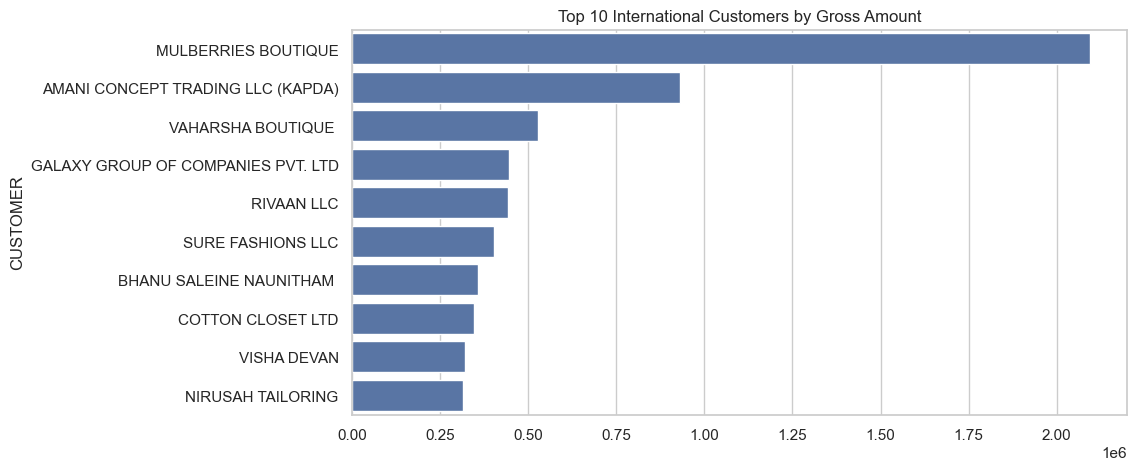

Top 10 Styles (International):
Style
SET268     215642.00
J0277      166201.00
J0242      132818.50
J0012      109461.43
SET252     104787.00
SET098     104029.00
SET110     102440.00
JNE3548     94873.50
J0230       93942.50
J0285       93121.00
Name: GROSS AMT, dtype: float64


In [5]:
df_intl = dataframes.get('International sale Report.csv')
if df_intl is not None:
    # Clean and convert types
    df_intl['DATE'] = pd.to_datetime(df_intl['DATE'], errors='coerce')
    df_intl['GROSS AMT'] = pd.to_numeric(df_intl['GROSS AMT'], errors='coerce')
    
    print(f"International Sales Range: {df_intl['DATE'].min()} to {df_intl['DATE'].max()}")
    
    # Sales by Customer
    top_customers = df_intl.groupby('CUSTOMER')['GROSS AMT'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(y=top_customers.index, x=top_customers.values, orient='h')
    plt.title('Top 10 International Customers by Gross Amount')
    plt.show()
    
    # Sales by Style/SKU
    top_styles = df_intl.groupby('Style')['GROSS AMT'].sum().sort_values(ascending=False).head(10)
    print("Top 10 Styles (International):")
    print(top_styles)

### 3.3 Sale Report.csv vs Amazon Sale Report.csv
Checking if 'Sale Report.csv' is a subset or different dataset.

In [6]:
df_sale = dataframes.get('Sale Report.csv')
if df_sale is not None and df_amazon is not None:
    # Check for SKU overlap
    amazon_skus = set(df_amazon['SKU'].unique())
    sale_skus = set(df_sale['SKU Code'].unique() if 'SKU Code' in df_sale.columns else [])
    
    overlap = amazon_skus.intersection(sale_skus)
    print(f"Amazon SKUs: {len(amazon_skus)}")
    print(f"Sale Report SKUs: {len(sale_skus)}")
    print(f"Overlap: {len(overlap)}")
    
    display(df_sale.head())

Amazon SKUs: 7195
Sale Report SKUs: 9171
Overlap: 6617


,index,SKU Code,Design No.,Stock,Category,Size,Color
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red


### 3.4 P & L March 2021 & May-2022
Analyzing Profit and Loss statements.

In [7]:
for name in ['P  L March 2021.csv', 'May-2022.csv']:
    df = dataframes.get(name)
    if df is not None:
        print(f"\n--- Analysis of {name} ---")
        display(df.head())
        # These files often have complex headers or unstructured data. Let's check structure.
        print(df.info())


--- Analysis of P  L March 2021.csv ---


,index,Sku,Style Id,Catalog,Category,Weight,TP 1,TP 2,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP
0,0,Os206_3141_S,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
1,1,Os206_3141_M,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
2,2,Os206_3141_L,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
3,3,Os206_3141_XL,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
4,4,Os206_3141_2XL,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           1330 non-null   int64 
 1   Sku             1330 non-null   object
 2   Style Id        1330 non-null   object
 3   Catalog         1330 non-null   object
 4   Category        1330 non-null   object
 5   Weight          1330 non-null   object
 6   TP 1            1330 non-null   object
 7   TP 2            1330 non-null   object
 8   MRP Old         1330 non-null   object
 9   Final MRP Old   1330 non-null   object
 10  Ajio MRP        1330 non-null   object
 11  Amazon MRP      1330 non-null   object
 12  Amazon FBA MRP  1330 non-null   object
 13  Flipkart MRP    1330 non-null   object
 14  Limeroad MRP    1330 non-null   object
 15  Myntra MRP      1330 non-null   object
 16  Paytm MRP       1330 non-null   object
 17  Snapdeal MRP    1330 non-null   object
dtypes: int64

,index,Sku,Style Id,Catalog,Category,Weight,TP,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP
0,0,Os206_3141_S,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
1,1,Os206_3141_M,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
2,2,Os206_3141_L,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
3,3,Os206_3141_XL,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
4,4,Os206_3141_2XL,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           1330 non-null   int64 
 1   Sku             1330 non-null   object
 2   Style Id        1330 non-null   object
 3   Catalog         1330 non-null   object
 4   Category        1330 non-null   object
 5   Weight          1330 non-null   object
 6   TP              1330 non-null   object
 7   MRP Old         1330 non-null   object
 8   Final MRP Old   1330 non-null   object
 9   Ajio MRP        1330 non-null   object
 10  Amazon MRP      1330 non-null   object
 11  Amazon FBA MRP  1330 non-null   object
 12  Flipkart MRP    1330 non-null   object
 13  Limeroad MRP    1330 non-null   object
 14  Myntra MRP      1330 non-null   object
 15  Paytm MRP       1330 non-null   object
 16  Snapdeal MRP    1330 non-null   object
dtypes: int64(1), object(16)
memory usage: 176.8+ KB
None

### 3.5 Expense IIGF
Analyzing expenses.

In [8]:
df_expense = dataframes.get('Expense IIGF.csv')
if df_expense is not None:
    display(df_expense)

,index,Recived Amount,Unnamed: 1,Expance,Unnamed: 3
0,0,Particular,Amount,Particular,Amount
1,1,06-19-22,1000,Large Bag,380
2,2,06-20-22,1500,"Stationary(Soft Pin, Paper pin for Dupatta, Fe...",170
3,3,06-22-22,500,OLA,839
4,4,06-23-22,2000,Auto Rent,520
5,5,NaN,NaN,TT Fine,500
6,6,NaN,NaN,Bhushan Hotel,2506
7,7,NaN,NaN,Food,1290
8,8,NaN,NaN,Expomart Labour Charge,200
9,9,NaN,NaN,Choclate,400


## 4. Relevance Summary

Based on the analysis, we will categorize files into:
1.  **Core Transactional Data**: Essential for sales queries.
2.  **Product/Inventory Data**: For SKU details.
3.  **Financial Data**: For P&L and expense queries.
4.  **Reference/Lookup**: For shipping rates etc.